<a href="https://colab.research.google.com/github/alexandrasouly/fastai_exploration/blob/main/lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.1MB/s 
     |████████████████████████████████| 1.2MB 33.1MB/s 
     |████████████████████████████████| 194kB 45.6MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.widgets import *
import getpass
azure_api_key = getpass.getpass()

··········


In [23]:
from fastbook import *
from fastai.vision.widgets import *

FastAI has a function that downloads images through the Bing API.
It returns not a list, but FastAI's own type, L() this is similar to a numpy list. attrgot() is implemented on L(), that get the values for each list element's dictionary key specified. Docs are here: https://fastcore.fast.ai/foundation.html#L.attrgot

In [10]:
results = search_images_bing(azure_api_key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)


150

In [15]:
print(results)
print(ims)

[{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=grizzly+bear&id=4FE226180F7071D1B3F36B29C2EA074B00E3CBEC&simid=607989609133525514', 'name': 'Grizzly Bear Basic Facts And New Pictures | The Wildlife', 'thumbnailUrl': 'https://tse1.mm.bing.net/th?id=OIP.Mw_Mi-jVWv9_0SNTuiGaSQHaE8&pid=Api', 'datePublished': '2012-10-15T12:00:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg', 'hostPageUrl': 'http://wildlifeanimalz.blogspot.com/2012/10/Grizzly-Bear.html', 'contentSize': '332689 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'wildlifeanimalz.blogspot.com/2012/10/Grizzly-Bear.html', 'width': 1600, 'height': 1068, 'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.kCKFU1-d0l3Elu2Vvbpmew&pid=Api', 'hostPageDomainFriendlyName': 'blogspot.com', 'hostPageDiscoveredDate': '2012-10-15T12:00:00.0000000Z', 'thumbnail': {'width': 474, 'height': 316}, 'imag

To save and show an image, there are lots of handy built-in functions too. FastAI also has the download_url function, that download any file from url to destination. 
They have implemented lots of helpers on the Image class too,like to_thumb. Docs are here: https://docs.fast.ai/vision.core.html

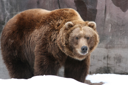

In [25]:
path = Path("images")
path.mkdir()
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)


In [27]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

We will build a model that recognises ballet, pole fitness and gymnastics. 
We first get pictures for each from Bing. FastAI has a very handy download_images function, docs at https://docs.fast.ai/vision.utils.html

In [37]:
sports = ['gymnastics', 'pole fitness', 'ballet']
path = Path('sports')
if not path.exists(): # avoiding accidentally rerunning API calls
  path.mkdir(exist_ok=True)
  for sport in sports:
      dest = path/sport # I didn't know you could do this wiht Path(), so cool
      dest.mkdir(exist_ok=True)
      results = search_images_bing(azure_api_key, sport)
      download_images(dest, urls=results.attrgot('contentUrl'))

We verify that everything worked:
get_image_files just returns the image files in the path directory. We can also check if downloads failed, verify_images() tries to open the files. To remove the corrupt ones, we can use unlink with the L object's map method. This calls the passed Path.unlink() function on each element of the L list.

In [40]:
fns = get_image_files(path)
display(fns)

failed = verify_images(fns)
display(failed)
failed.map(Path.unlink);

(#421) [Path('sports/pole fitness/00000110.jpg'),Path('sports/pole fitness/00000137.jpg'),Path('sports/pole fitness/00000051.jpeg'),Path('sports/pole fitness/00000025.jpg'),Path('sports/pole fitness/00000010.jpg'),Path('sports/pole fitness/00000049.JPG'),Path('sports/pole fitness/00000093.jpg'),Path('sports/pole fitness/00000117.png'),Path('sports/pole fitness/00000089.jpg'),Path('sports/pole fitness/00000094.jpg')...]

(#3) [Path('sports/pole fitness/00000132.png'),Path('sports/ballet/00000040.jpg'),Path('sports/ballet/00000011.jpg')]